<a href="https://colab.research.google.com/github/abha-m/colab_tensorflow_tutorial/blob/master/CSE538TensorflowTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this tutorial

This introductory tutorial to TensorFlow will give an overview of some of the basic concepts of TensorFlow in Python. It would help you to get started with this framework and do your assignments! We will discuss the concept behind Tensorflow, basic operatios, and simple models only. Most of our dicussion would be related to the low level APIs.

Author,

Leena Shekhar, Stony Brook University

In [0]:
# imports
from tensorflow.examples.tutorials.mnist import input_data
from IPython.display import HTML, Image
import tensorflow as tf
import numpy as np
import time
import os

In [0]:
hello = tf.constant('Hello, CSE 538!')
print(hello)
print("Uh oh!")
sess = tf.Session()
print(sess.run(hello))
sess.close()

Tensor("Const:0", shape=(), dtype=string)
Uh oh!
Hello, CSE 538!


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Tensorflow Overview

#### What is Tensorflow?

1. It is an open source software by Google, designed to allow efficient computation of data flow graphs, is especially suited to deep learning tasks.  

2. It is designed to be executed on a single or multiple CPUs and GPUs, making it a good option for complex deep learning tasks.

3. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them.

## Setup & Installation

Installating Tensorflow is easy and well explained here: https://www.tensorflow.org/install/.

## Tensorflow Graph & Session

Note: This is an important section as people usually get confused over the rules of tf.Graph and tf.Session so understand this carefuly.

#### What is a Tensor?

An n-dimensional matrix. 

1. 0-d tensor: scalar/number
2. 1-d tensor: vector
3. 2-d tensor: matrix and so on ...

#### What is a dataflow graph?

TensorFlow uses a dataflow graph to represent all the computation in terms of the dependencies between individual operations. 

This leads to a low-level programming model in which you first define the dataflow graph, then create a TensorFlow session to run parts of the graph across a set of devices (local and remote). 

#### Why a dataflow grap?

Consider the following expression a=(b+c)∗(c+2). We can break this function down into the following components:

d= b + c

e = c + 2

a = d * e

Now these operations can be represented graphically as:

In [0]:
Image(filename="images/Drawing.jpeg")

IOError: ignored

Two of the computations (d=b+c and e=c+2) can be performed in parallel.  By splitting up these calculations across CPUs or GPUs, this can give us significant gains in computational times.  

These gains are a must for big data applications and deep learning – especially for complicated neural network architectures such as Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs).
Advantages:

Read about advantages in detail here: https://www.tensorflow.org/programmers_guide/graphs.

#### What does a Tensorflow graph look like?

The graph below shows the computational graph of a three-layer neural network. 

1. Input Layer: The animated data flows between different nodes in the graph are tensors which are multi-dimensional data arrays. 

2. Intemediate Layer: After the input layer there is a hidden layer with rectified linear units as the activation function. 

3. Output Layer: There is a final output layer (called a “logit layer” in the above graph) which uses cross entropy as a loss function. 

At each point we see the relevant tensors flowing to the “Gradients” block which finally flow to the Stochastic Gradient Descent optimiser which performs the back-propagation and gradient descent.

In [0]:
HTML('<img src="http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/TensorFlow-data-flow-graph.gif">')

#### What is a session?

1. A graph defines the computation. It doesn’t compute anything as it doesn’t hold any values, it just defines the operations that you specified in your code.

2. A session allows to execute graphs or part of graphs. It allocates resources (on one or more machines) for that and holds the actual values of intermediate results and variables.

In [0]:
# explicitly defining a default graph. 
mygraph = tf.Graph()
with mygraph.as_default():
  myvariable = tf.Variable(42, name='my_var') # operation 1
  initialize = tf.global_variables_initializer() # operation 2
  assign13 = myvariable.assign(13) # operation 3

To run any of the three defined operations above, we need to create a session for that graph. The session will also allocate memory to store the current value of the variable.

In [0]:
# error: Attempting to use uninitialized value my_var
with tf.Session(graph=mygraph) as sess:
  print(sess.run(myvariable))


FailedPreconditionError: ignored

When you launch the graph, variables have to be explicitly initialized before you can run operations that use their value.

The value of our variable is only valid within one session. If we try to query the value afterwards in a second session, TensorFlow will raise an error because the variable is not initialized there. 

In [0]:
# printing the output in a session
with tf.Session(graph=mygraph) as sess:
    sess.run(initialize)
    sess.run(assign13)
    print(sess.run(myvariable))

13


In [0]:
# printing the output in a different session
with tf.Session(graph=mygraph) as sess:
    sess.run(initialize)
    print(sess.run(myvariable))

42


We can use the graph in more than one session, we just have to initialize the variables again. The values in the new session will be completely independent from the first one

Note: You can have multiple graphs though that is preferable. This is out of scope for us. 

#### Spot the difference!

In [0]:
c = tf.add(3, 5)
print("This is an abstraction: {}".format(c))

c = np.add(3, 5)
print("This is an actual calculation: {}".format(c))

This is an abstraction: Tensor("Add:0", shape=(), dtype=int32)
This is an actual calculation: 8


## Basic Operations

Let’s make TensorFlow perform our simple calculation above a=(b+c)∗(c+2).

In [0]:
# first, create a TensorFlow constant
const = tf.constant(2.0, name="const")

# create TensorFlow variables
b = tf.Variable(2.0, name='b')
# b = tf.placeholder(tf.float32, [None, 1], name='b')
c = tf.Variable(1.0, name='c')


1. The first element in both is the value to be assigned the constant / variable when it is initialised. 
 
2. The second is an optional name string which can be used to label the constant / variable – this is handy for when you want to do visualisations.  

TensorFlow will infer the type of the constant / variable from the initialised value, but it can also be set explicitly using the optional dtype argument.  

In [0]:
# now create some operations
d = tf.add(b, c, name='d')
e = tf.add(c, const, name='e')
a = tf.multiply(d, e, name='a')

# setup the variable initialisation
init_op = tf.global_variables_initializer()

# start the session
with tf.Session() as sess:
    # initialise the variables
    sess.run(init_op)
#     a_out = sess.run(a, feed_dict={b: np.arange(0, 10)[:, np.newaxis]})
    # compute the output of the graph
    a_out = sess.run(a)
    print("Variable a is {}".format(a_out))

Variable a is 9.0


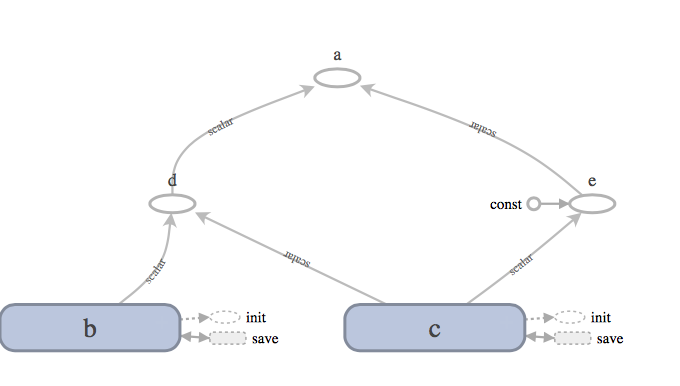

In [0]:
Image(filename="images/basic-ops.png")

Note: We defined operations d and e which need to be calculated before we can figure out what a is.  However, we don’t have to explicitly run those operations, as TensorFlow knows what other operations and variables the operation a depends on, and therefore runs the necessary operations on its own.

Let’s say that we didn’t know what the value of the array b would be during the declaration phase of the TensorFlow problem (i.e. before the with tf.Session() as sess) stage.  In this case, TensorFlow requires us to declare the basic structure of the data by using the tf.placeholder variable declaration.  Let’s use it for b:

In [0]:
# first, create a TensorFlow constant
const = tf.constant(2.0, name="const")

# create TensorFlow variables
b = tf.placeholder(tf.float32, [None, 1], name='b')
c = tf.Variable(1.0, name='c')

# now create some operations
d = tf.add(b, c, name='d')
e = tf.add(c, const, name='e')
a = tf.multiply(d, e, name='a')

# setup the variable initialisation
init_op = tf.global_variables_initializer()

# start the session
with tf.Session() as sess:
    # initialise the variables
    sess.run(init_op)
    a_out = sess.run(a, feed_dict={b: np.arange(0, 10)[:, np.newaxis]})
    # compute the output of the graph
    print("Variable a is {}".format(a_out))



Variable a is [[ 3.]
 [ 6.]
 [ 9.]
 [12.]
 [15.]
 [18.]
 [21.]
 [24.]
 [27.]
 [30.]]


## Logistic Regression Model

#### Dataset

The MNIST data is split into three parts: 
1. 55,000 data points of training data (mnist.train)
2. 10,000 points of test data (mnist.test), and 
3. 5,000 points of validation data (mnist.validation). This split is very important!

We call the images "x" and the labels "y". Each image is 28 pixels by 28 pixels- once flattened 784 numbers. Each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image. Each image in MNIST has a corresponding label, a number between 0 and 9 representing the digit drawn in the image.

In [0]:
""" Simple logistic regression model to solve OCR task 
"""
# INFO and WARNING messages are not printed
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# Define hyperparamaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 30

# Step 1: Read in data
# using TF Learn's built in function to load MNIST data to the folder data/mnist
mnist = input_data.read_data_sets('data/mnist', one_hot=True) 

# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
Y = tf.placeholder(tf.int32, [batch_size, 10], name='Y_placeholder')

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name="bias")

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
# computes the mean over all the examples in the batch
loss = tf.reduce_mean(cross_entropy) 

# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

with tf.Session() as sess:
	# to visualize using TensorBoard
	writer = tf.summary.FileWriter('examples/graphs/logistic_reg', sess.graph)

    #training the model
	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
    # train the model n_epochs times
	for i in range(n_epochs): 
		total_loss = 0
		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			# pass all variables whose values you want as a list            
			_, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print('Total time: {0} seconds'.format(time.time() - start_time))
	print('Optimization Finished!') 

	#testing the model
	
	preds = tf.nn.softmax(logits)
    # get the index of the highest entry in a tensor along some axis
	correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1))
    # gives us a list of booleans. determine what fraction are correct, we cast to floating point numbers and then take the mean
	accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) 
	
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	
	for i in range(n_batches):
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		accuracy_batch = sess.run([accuracy], feed_dict={X: X_batch, Y:Y_batch}) 
		total_correct_preds += accuracy_batch[0]	
	
	print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

	save_path = saver.save(sess, "examples/graphs/logistic_reg/lr_model.ckpt")
	print("Model saved in path: %s" % save_path)
	writer.close()


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

 There we go – approximately 92% accuracy on the test set, not bad.  We could do a number of things to improve the model, but here we are just interested in exploring TensorFlow. 

#### Why so many saved files??

TensorFlow save method saves three kinds of files because it stores the graph structure separately from the variable values.

1. The .meta file describes the saved graph structure.
2. .data stores the values of each variable in the graph
3. .index identifies the checkpoint

In [0]:
# start tensorboard for visualization
os.system('tensorboard --logdir examples/graphs/')

# navigate to http://127.0.1.1:6006

0

More about tensorboard here, https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard.

### References

1. [Tensorflow](https://www.tensorflow.org/)
2. [Stanford CS 20](https://web.stanford.edu/class/cs20si/)
3. [Danijar Hafner Blog](https://danijar.com/what-is-a-tensorflow-session/)
4. [Adventures in ML](http://adventuresinmachinelearning.com/python-tensorflow-tutorial/)

<span style="color:red">Note: Please <b>DO NOT</b> refer to any code outside for your assignment!</span>